**Project Description: Tweet Classification (Politics vs. Sports)**

**Objective:**
The objective of this project is to develop a machine learning model capable of classifying tweets into two categories: Politics and Sports. The model will be trained on a labeled dataset consisting of tweet texts along with their corresponding labels. The primary evaluation metric for this project is classification accuracy.

**Dataset:**
The dataset contains the following columns:

- `TweetId`: A unique identifier for each tweet.
- `Label`: The target variable indicating whether the tweet is related to Politics or Sports.
- `TweetText`: The text content of the tweet.


**Part 1: Loading Data:**

In [1]:
import pandas as pd

# Load the dataset
train_data = pd.read_csv('/kaggle/input/deeptweets/train.csv')
test_data = pd.read_csv('/kaggle/input/deeptweets/test.csv')

# Display the first few rows of the training data
train_data.head()

,TweetId,Label,TweetText
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...
1,304834304222064640,Politics,'@rraina1481 I fear so'
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...


**Part 2: Preprocessing:**

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert labels to 1 and 0
label_mapping = {'Politics': 1, 'Sports': 0}
train_data['Label'] = train_data['Label'].map(label_mapping)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_data['TweetText'], train_data['Label'], test_size=0.2, random_state=1)

# Use TF-IDF for text vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Display the shape of the TF-IDF matrices
X_train_tfidf.shape, X_test_tfidf.shape

((5220, 5000), (1305, 5000))

**Part 3: Modeling:**

RandomForestClassifier

In [3]:
from sklearn.ensemble import RandomForestClassifier

# Create and train a random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)


RandomForestClassifier(random_state=42)

Logistic Regression

In [4]:
from sklearn.linear_model import LogisticRegression

# Create and train a logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_tfidf, y_train)


LogisticRegression()

Support Vector Machine (SVM)

In [5]:
from sklearn.svm import SVC

# Create and train a support vector machine model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)


SVC(kernel='linear')

MultinomialNB

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create and train a Multinomial Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

**Part 4: Evaluation:**

Logistic Regression Accuracy: 0.9340996168582375
Random Forest Accuracy: 0.9042145593869731
Support Vector Machine Accuracy: 0.9409961685823754


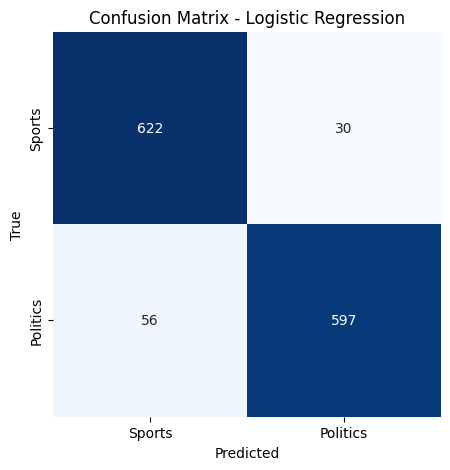

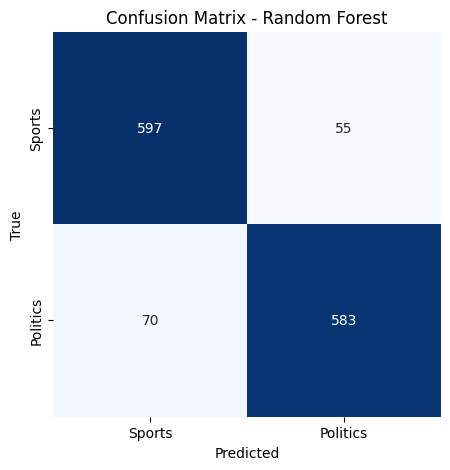

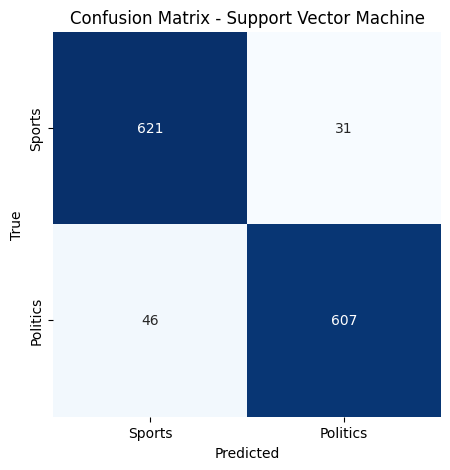

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, model_name):
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Sports", "Politics"], yticklabels=["Sports", "Politics"])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Make predictions on the test set
logreg_pred = logreg_model.predict(X_test_tfidf)
rf_pred = rf_model.predict(X_test_tfidf)
svm_pred = svm_model.predict(X_test_tfidf)

# Evaluate logistic regression model
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_report = classification_report(y_test, logreg_pred)
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)

# Evaluate random forest model
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

# Evaluate support vector machine model
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)
svm_conf_matrix = confusion_matrix(y_test, svm_pred)

# Display the evaluation metrics
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("Support Vector Machine Accuracy:", svm_accuracy)

# Plot confusion matrices
plot_confusion_matrix(logreg_conf_matrix, "Logistic Regression")
plot_confusion_matrix(rf_conf_matrix, "Random Forest")
plot_confusion_matrix(svm_conf_matrix, "Support Vector Machine")



**Create and train a Multinomial Naive Bayes model with hyperparameter tuning**

In [8]:
from sklearn.model_selection import GridSearchCV
nb_model = MultinomialNB()
# Define the hyperparameters to tune
param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}
# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(nb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)
# Print the best hyperparameters
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha}")
# Train the model with the best hyperparameters
best_nb_model = MultinomialNB(alpha=best_alpha)
best_nb_model.fit(X_train_tfidf, y_train)

Best alpha: 0.1


MultinomialNB(alpha=0.1)

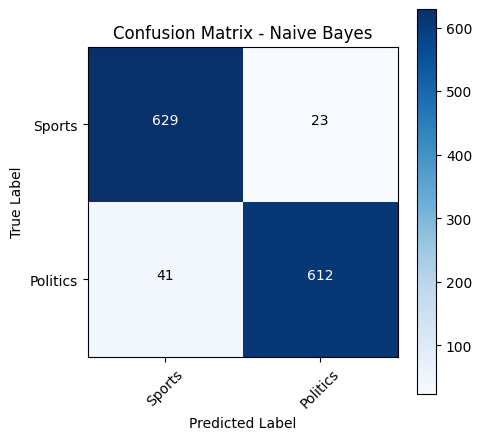

Naive Bayes Accuracy: 0.9509578544061302

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       652
           1       0.96      0.94      0.95       653

    accuracy                           0.95      1305
   macro avg       0.95      0.95      0.95      1305
weighted avg       0.95      0.95      0.95      1305



In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test set
nb_predictions = best_nb_model.predict(X_test_tfidf)

# Evaluate the model
nb_accuracy = best_nb_model.score(X_test_tfidf, y_test)
nb_conf_matrix = confusion_matrix(y_test, nb_predictions)
nb_classification_report = classification_report(y_test, nb_predictions)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
plt.imshow(nb_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Naive Bayes')
plt.colorbar()

classes = ['Sports', 'Politics']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Annotate the confusion matrix with the count of each cell
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(nb_conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if nb_conf_matrix[i, j] > nb_conf_matrix.max() / 2 else "black")

plt.show()

# Display classification report
print("Naive Bayes Accuracy:", nb_accuracy)
print("\nClassification Report:\n", nb_classification_report)

In [10]:
# Vectorize the test data using the same TF-IDF vectorizer
X_test_tfidf = tfidf_vectorizer.transform(test_data['TweetText'])

# Make probability predictions using the Multinomial Naive Bayes model
nb_probs = best_nb_model.predict_proba(X_test_tfidf)[:, 1]

# Convert probabilities to binary predictions based on a threshold (e.g., 0.5)
nb_predictions = (nb_probs > 0.5).astype(int)

# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'TweetId': test_data['TweetId'],
    'Label': nb_predictions
})

# Map the numeric labels back to the original labels
submission_df['Label'] = submission_df['Label'].map({0: 'Sports', 1: 'Politics'})

# Display the first few rows of the submission DataFrame
submission_df.head()




,TweetId,Label
0,306486520121012224,Sports
1,286353402605228032,Politics
2,289531046037438464,Politics
3,306451661403062273,Politics
4,297941800658812928,Sports


In [11]:
# Save the submission dataframe to a CSV file
submission_df.to_csv("submission.csv", index=False)